In [1]:
from pdf_wrapper import PDFWrapper
import pdfminer
import sys
import matplotlib.patches as patches
from bs4 import BeautifulSoup
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
from pdfminer.high_level import extract_pages
from pdfminer.layout import LTTextContainer
from tqdm import tqdm
from pdfminer.layout import LAParams

In [2]:
fname = "/Users/liusean/Desktop/Projects/Coding/ML/ForwardLab/SP23/data/cv-amato.pdf"
cv = PDFWrapper(fname)

Using laparams =  <LAParams: char_margin=2.0, line_margin=0.5, word_margin=0.1 all_texts=False>


41it [00:01, 22.26it/s]


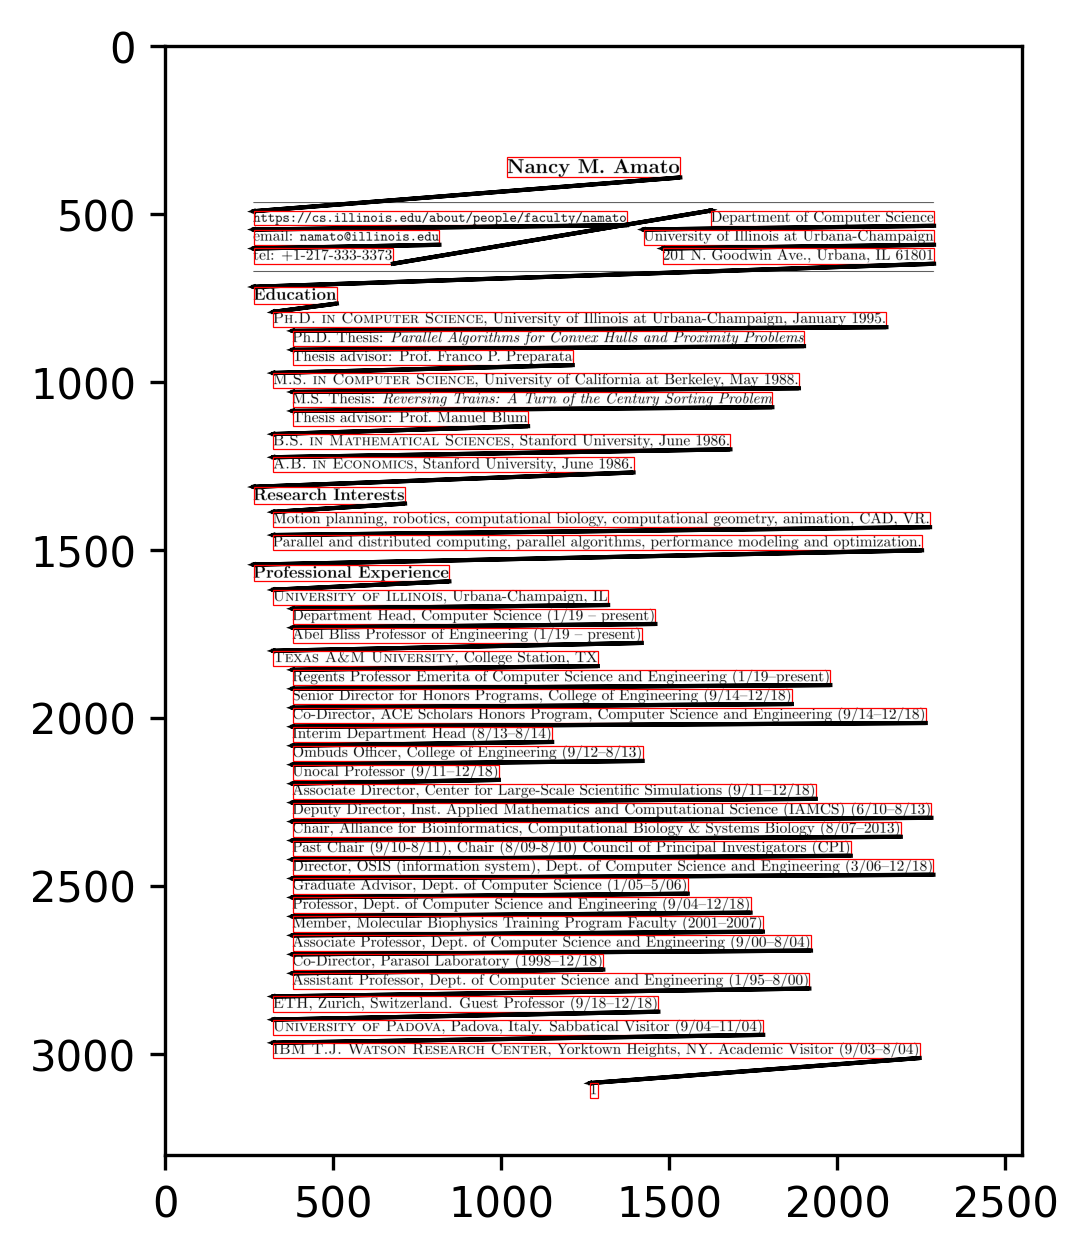

In [3]:
ax = cv.render_page(0)   
plt.show()

In [4]:
def reject_outliers(data, m=3):
    return data[(np.abs(data - data.mean()) < m * data.std())]

(array([ 35.,  57.,  74., 186., 497.,  37.,  23.,  14.,  55., 470.,   4.,
          7.,   3.,  23.,  33.,   4.,   5.,   5.,   3.,  18.,   0.,   2.,
          4.,   1.,   8.,   1.,   0.,   2.,   0.,  27.,   5.,   1.,   1.,
          2.,   3.,   0.,   1.,   0.,   3.,   4.,   0.,   2.,   1.,   0.,
          0.,   0.,   1.,   1.,   0.,   1.,   0.,   0.,   0.,   2.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   4.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   2.]),
 array([0.        , 0.05478571, 0.10957143, 0.16435714, 0.21914286,
        0.27392857, 0.32871429, 0.3835    , 0.43828571, 0.49307143,
        0.54785714, 0.60264286, 0.65742857, 0.71221429, 0.767     ,
        0.82178571, 0.87657143, 0.93135714, 0.98614286, 1.04092857,
        1.09571429, 1.1505    , 1.20528571, 1.26007143, 1.31485714,
        1.36964286, 1.42442857, 1.47921429, 1.534     , 1.58878571,
        1.64357143, 1.69835714, 1.75314286, 1.80792857, 1.86271429,
        1.9175    , 1.97228571, 2.02707143, 2.

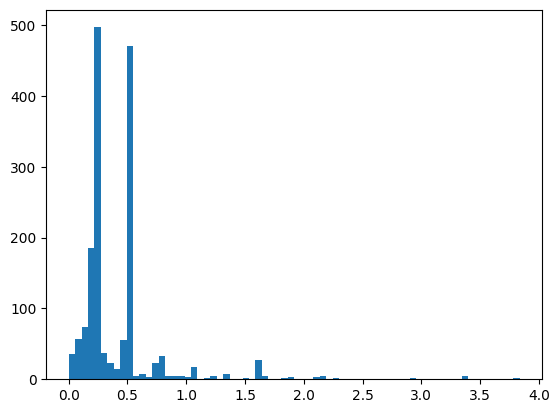

In [5]:
y_diff = cv.get_ydiff_distribution()
y_diff = y_diff[y_diff >= 0]

plt.hist(reject_outliers(y_diff), bins = 70)

In [6]:
uni, cnts = np.unique(y_diff, return_counts = True)

In [1]:
laparams = LAParams(line_margin = 1.0)
print(laparams)
cv = PDFWrapper(fname, laparams_ = laparams)
cv.render_page(1)

NameError: name 'LAParams' is not defined

In [8]:
line_cnt = 0

for page_layout in tqdm(extract_pages(fname, laparams = laparams)):
    for element in page_layout:
        if isinstance(element, LTTextContainer):
            for line in element:
                line_cnt += 1

print(line_cnt)

18it [00:01, 10.39it/s]

1252


In [ ]:
def get_json(wrapper_obj):
    # gets the JSON content as a string from wrapper_obj
    